# Entregável 1 - visão computacional

Alunos: Marcos Vinícius da Silva e Enrico Francesco Damiani

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 4.2.0 


# Equalização de histograma

In [2]:
rintin = cv2.imread("RinTinTin.jpg") 

In [3]:
rintin.shape

(240, 320, 3)

In [4]:
rintin_gray = cv2.cvtColor(rintin, cv2.COLOR_RGB2GRAY)

In [5]:
rintin_gray.shape

(240, 320)

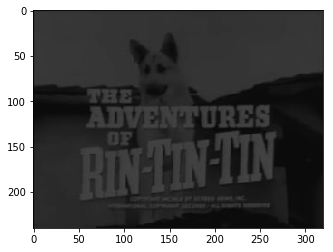

In [6]:
plt.imshow(rintin_gray, cmap="Greys_r", vmin=0, vmax=255)

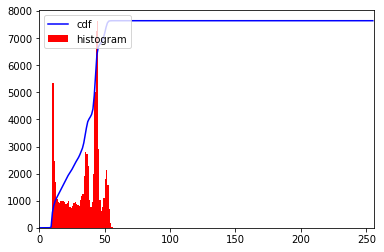

In [7]:

hist,bins = np.histogram(rintin_gray.flatten(),256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(rintin_gray.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

<h2> Atividade 1</h1>

<h4>1. O histograma fornecido aproveita bem as faixas de cores?</h4>

<p style="text-align:justify">
Não, pois como podemos observar o histograma está do lado esquerdo do gráfico e isso quer dizer que não há um aproveitamento bom da faixa de cores.
</p>

<h4>2. Crie uma imagem derivada da imagem fornecida que use melhor a faixa dinâmica, ou seja, tenha o valor dos seus pixels distribuídos entre 0 e 255.</h4>

In [8]:
rintin = cv2.imread("RinTinTin.jpg")

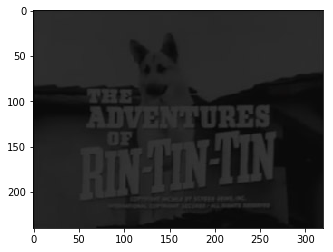

In [9]:
plt.imshow(rintin)

In [10]:
rintin.shape

(240, 320, 3)

In [11]:
rintin.min()

8

In [17]:
rintin.max()

58

In [18]:
saida = np.zeros((240, 320, 3), dtype=np.uint8)

In [19]:
valor_maximo = rintin.max()
for rgb in range(rintin.shape[2]):
    
    for linha in range(rintin.shape[0]):

        for coluna in range(rintin.shape[1]):
            saida[linha][coluna][rgb] = rintin[linha][coluna][rgb]*255/valor_maximo

<h4>3. Plote a imagem pedida</h4>

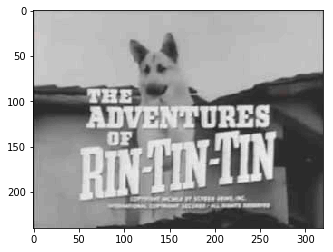

In [20]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

## Atividade 2

Leia com a OpenCV a figura abaixo:

![](cena_canto_sala.jpg)

Separe os canais  R e B das imagens e analise seus histogramas.

1. A partir dos canais R e B e da análise do histograma é possível identificar a caixa vermelha e o creeper azul?

1. Crie uma imagem numpy em que somente os pixels da caixa vermelha estão brancos e faça seu plot aqui. Você vai precisar usar manipulação de canais RGB. Use o [ExemploFor.ipynb](ExemploFor.ipynb) .


In [21]:
img = cv2.imread("cena_canto_sala.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(605, 806, 3)

In [22]:
img_r = img[:,:,0]
img_b = img[:,:,2]
img_r.shape

(605, 806)

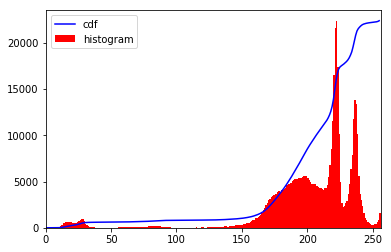

In [23]:
hist,bins = np.histogram(img_r,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_r.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

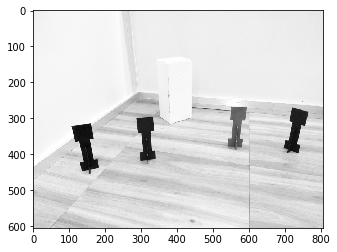

In [24]:
plt.imshow(img_r, cmap="Greys_r", vmin=0, vmax=255)

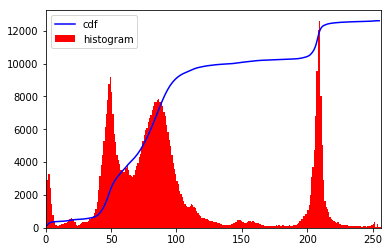

In [25]:
hist,bins = np.histogram(img_b,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_b.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

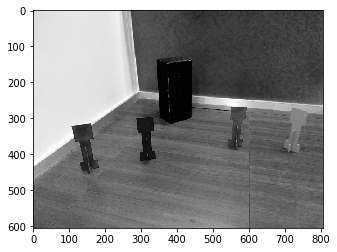

In [26]:
plt.imshow(img_b, cmap="Greys_r", vmin=0, vmax=255)

<p style="text-align:justify">
É possível identificar tanto a caixa vermelha quanto o creeper azul. Respectivamente, analisando os histogramas, o primeiro, baseado na cor vermelha, é possivel observar a caixa em seu extremo do eixo x, ja que esta apresenta alta homogeniedade em sua textura vermelha. O creeper, por sua vez, pode ser encontrado como o pico após a marca de 250 do histograma de coloração azul.
</p>

In [27]:
saidar = np.zeros((3024, 4032), dtype=np.uint8)
for i in range(img_r.shape[0]):
    for j in range(img_r.shape[1]):
        if img_r[i][j] > 215:
            saidar[i][j] = 255
        else:
            saidar[i][j] = 0

In [28]:
saidab = np.zeros((3024, 4032), dtype=np.uint8)
for i in range(img_b.shape[0]):
    for j in range(img_b.shape[1]):
        if img_b[i][j] < 30:
            saidab[i][j] = 255
        else:
            saidab[i][j] = 0

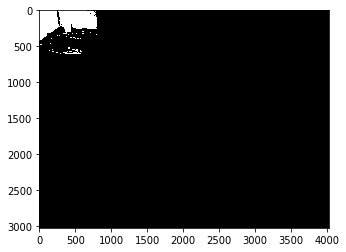

In [29]:
plt.imshow(saidar, cmap="Greys_r", vmin=0, vmax=255)

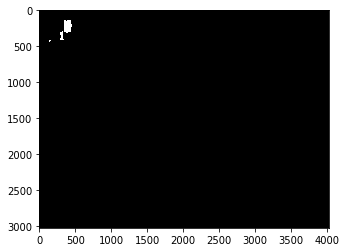

In [30]:
plt.imshow(saidab, cmap="Greys_r", vmin=0, vmax=255)

In [31]:
saidaf = np.zeros((3024, 4032), dtype=np.uint8)
for i in range(img_r.shape[0]):
    for j in range(img_r.shape[1]):
        if img_r[i][j] > 215 and img_b[i][j] < 30:
            saidaf[i][j] = 255
        else:
            saidaf[i][j] = 0

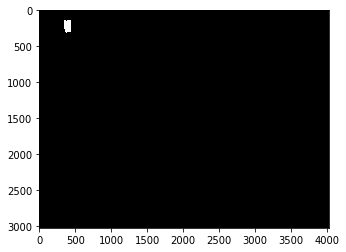

In [32]:
plt.imshow(saidaf, cmap="Greys_r", vmin=0, vmax=255)

# Atividade 3


Abra a imagem `hall_box_battery_atividade3.png`  e a converta para tons de cinza de `0` a `255`.

Forneça como saída uma uma cópia da imagem  em que cada pixel  recebe o módulo da subtração entre o pixel que vem depois e o que vem antes dele (na horizontal).

Obs.: O conceito de *antes* e *depois* pode ser na horizontal ou na vertical

Apresente a imagem resultado, deve ficar parecida com a imagem `gabarito_atividade_3.png`.

<img src="gabarito_atividade_3.png" width=400>

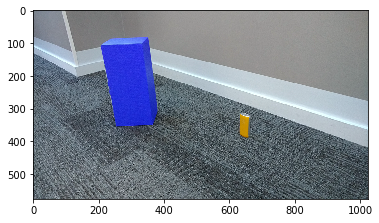

In [33]:
hall_box = cv2.imread("hall_box_battery_atividade3.png")
plt.imshow(hall_box, cmap="Greys_r", vmin=0, vmax=255)

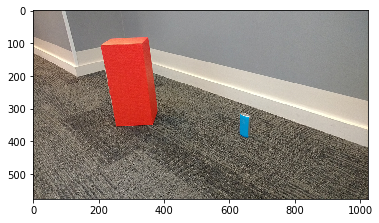

In [34]:
hall_boxf = cv2.cvtColor(hall_box, cv2.COLOR_BGR2RGB)
plt.imshow(hall_boxf, cmap="Greys_r", vmin=0, vmax=255)

In [35]:
hall_boxf.shape

(576, 1024, 3)

In [36]:
hall_boxf

array([[[126, 122, 110],
        [139, 133, 121],
        [133, 127, 115],
        ...,
        [128, 129, 133],
        [129, 130, 135],
        [128, 129, 134]],

       [[133, 129, 118],
        [132, 127, 116],
        [135, 128, 118],
        ...,
        [130, 135, 135],
        [124, 126, 128],
        [128, 127, 131]],

       [[135, 132, 121],
        [132, 126, 116],
        [130, 123, 113],
        ...,
        [124, 129, 129],
        [130, 134, 135],
        [127, 131, 131]],

       ...,

       [[ 96,  89,  79],
        [133, 125, 115],
        [149, 139, 129],
        ...,
        [ 79,  70,  61],
        [ 80,  72,  67],
        [ 64,  54,  48]],

       [[101,  91,  83],
        [130, 121, 113],
        [134, 126, 116],
        ...,
        [ 66,  57,  48],
        [ 61,  50,  45],
        [ 47,  37,  29]],

       [[ 98,  89,  83],
        [ 84,  74,  67],
        [ 90,  80,  71],
        ...,
        [ 42,  31,  23],
        [ 60,  48,  44],
        [ 69,  59,  51]]

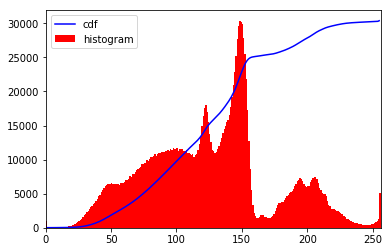

In [37]:
hist,bins = np.histogram(hall_boxf,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_boxf.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [38]:
hall_box_v = cv2.cvtColor(hall_boxf, cv2.COLOR_RGB2GRAY)
hall_boxfx = hall_box_v.copy()

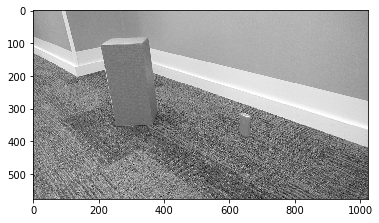

In [39]:
plt.imshow(hall_boxfx, cmap="Greys_r", vmin=0, vmax=255)

In [40]:
hall_boxfx.shape

(576, 1024)

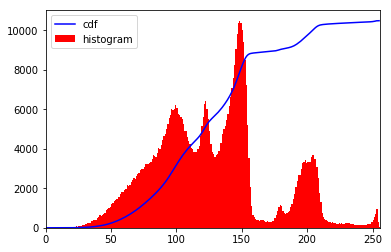

In [41]:
hist,bins = np.histogram(hall_boxfx,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(hall_boxfx.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [42]:
saida = np.zeros((576,1024), dtype=np.uint8)
for i in range(hall_boxfx.shape[0]):
    for j in range(hall_boxfx.shape[1]):
        if j < 1023 and j != 0:
                saida[i][j] = abs(int(hall_boxfx[i][j+1]) - int(hall_boxfx[i][j-1]))
        else:
            saida[i][j] = hall_boxfx[i][j]

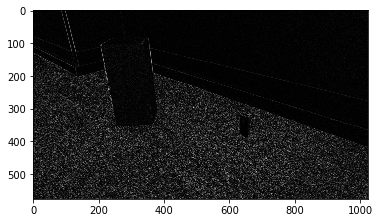

In [43]:
plt.imshow(saida, cmap="Greys_r", vmin=0, vmax=255)

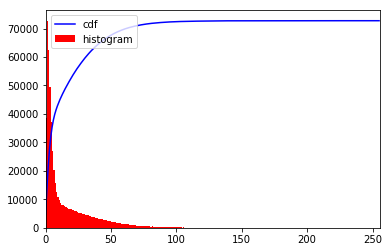

In [44]:
hist,bins = np.histogram(saida,256,[0,256])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(saida.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()